<ipython-input-1-85c3f94b02d1>:519: UserWarning: Attempting to set identical left == right == 0.1 results in singular transformations; automatically expanding.
  plt.xlim([plot_lims[0], plot_lims[1]])
<ipython-input-1-85c3f94b02d1>:520: UserWarning: Attempting to set identical left == right == 0.05 results in singular transformations; automatically expanding.
  plt.xlim([lat_lims[0],lat_lims[1]])
<ipython-input-1-85c3f94b02d1>:519: UserWarning: Attempting to set identical left == right == 0.1 results in singular transformations; automatically expanding.
  plt.xlim([plot_lims[0], plot_lims[1]])
<ipython-input-1-85c3f94b02d1>:520: UserWarning: Attempting to set identical left == right == 0.05 results in singular transformations; automatically expanding.
  plt.xlim([lat_lims[0],lat_lims[1]])
<ipython-input-1-85c3f94b02d1>:519: UserWarning: Attempting to set identical left == right == 0.1 results in singular transformations; automatically expanding.
  plt.xlim([plot_lims[0], plot_lims[1]])

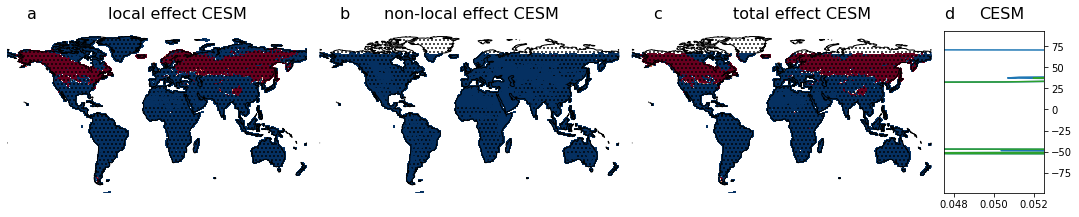

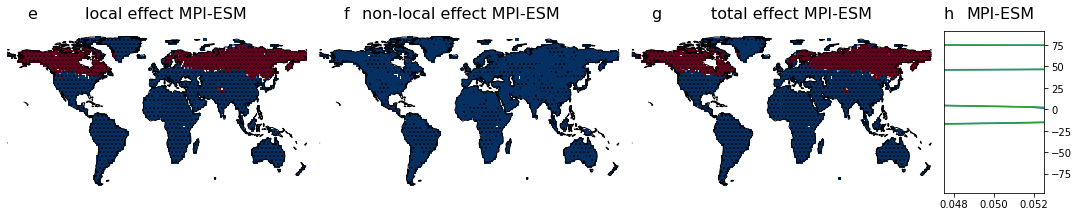

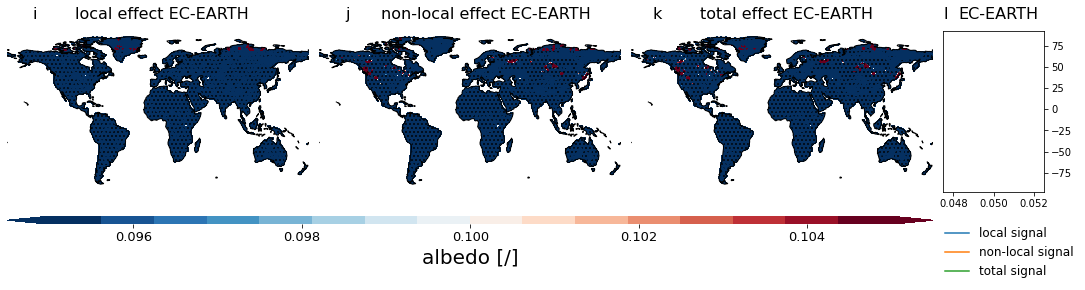

In [1]:
#add panel labels and model names         ax[j-1].text(0.1, 1.15, P_list[j-1], transform=ax.transAxes,fontsize=16, fontweight='bold', va='top', ha='right')

outdir='/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/cesm/work/postprocessing/signals_seperated/'
#title='2m air temperature'
import mplotutils as mpu
from func_utils import *
plt.rcParams['figure.figsize'] = [18, 7.5]
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
matplotlib.rc('axes',edgecolor='none')

case='crop-frst'
season=False 
sensitivity=False
level='none'
relative=False 
vlims=[0.1,0.10]
lat_lims=[0.05,0.05]
mask='lnd'
model_list=['cesm', 'mpiesm','ecearth']
var_list=['albedo','albedo','albedo']

cmor_list=['Lmon','Lmon','Amon']
#unit='W/m$^{2}$'
unit='/'
label='albedo'
#nit='/ '
#unit='m$^{-2}$/m$^{-2}$'
k=0
for model in model_list:
    k=k+1
    if model=='cesm':
        var=var_list[0]
        cmor_table=cmor_list[0]
    elif model=='mpiesm':
        var=var_list[1]
        cmor_table=cmor_list[1]
    elif model=='ecearth':
        var=var_list[2]
        cmor_table=cmor_list[2]

    if var != 'PRECT':
        varname=var
        var_local=var+'_local'
        var_nonlocal=var+'_nonlocal'
        var_total=var+'_total'

        tseriesdir= outdir + '/'+case+'/' +cmor_table+'/' + varname +'/'
        fn=varname + '_' + case +'_' + model + '_ensmean_signal-separated.nc'
        if model=='ecearth':
            fn= 'interped_'+varname + '_' + case +'_' + model + '_ensmean_signal-separated.nc'
        if season== False & os.path.isfile(tseriesdir + fn):
            fn1 = varname + '_' + case +'_' + model + '_timmean000000_signal-separated.nc'
            fn2 = varname + '_' + case +'_' + model + '_timmean000001_signal-separated.nc'
            fn3 = varname + '_' + case +'_' + model + '_timmean000002_signal-separated.nc'
            fn4 = varname + '_' + case +'_' + model + '_timmean000003_signal-separated.nc'
            fn5 = varname + '_' + case +'_' + model + '_timmean000004_signal-separated.nc'
            if model=='ecearth':
                fn1 = 'interped_'+varname + '_' + case +'_' + model + '_timmean000000_signal-separated.nc'
                fn2 = 'interped_'+varname + '_' + case +'_' + model + '_timmean000001_signal-separated.nc'
                fn3 = 'interped_'+varname + '_' + case +'_' + model + '_timmean000002_signal-separated.nc'
                fn4 = 'interped_'+varname + '_' + case +'_' + model + '_timmean000003_signal-separated.nc'
                fn5 = 'interped_'+varname + '_' + case +'_' + model + '_timmean000004_signal-separated.nc'
                sign_local=np.zeros((192,288))
                sign_nonlocal=np.zeros((192,288))
                sign_total=np.zeros((192,288))
            if model =='cesm':
                sign_local=np.zeros((192,288))
                sign_nonlocal=np.zeros((192,288))
                sign_total=np.zeros((192,288))
            elif model=='mpiesm':
                sign_local=np.zeros((96,192))
                sign_nonlocal=np.zeros((96,192))
                sign_total=np.zeros((96,192))
            fn_list=[fn1,fn2,fn3,fn4,fn5]
            if case=='harv-frst':
                fn_list=[fn1,fn2,fn3,fn4]
            for fn in fn_list:
                ds = xr.open_dataset(tseriesdir+fn)
             #ds_mask = xr.open_dataset(mask)
                if level != 'none':
                    da_local=ds[var_local].mean('time')[level,:,:]
                    da_nonlocal=ds[var_nonlocal].mean('time')[level,:,:]
                    da_total=ds[var_total].mean('time')[level,:,:]
                else:
                    if model != 'ecearth':
                        da_local=ds[var_local].mean('time')
                        da_nonlocal=ds[var_nonlocal].mean('time')
                        da_total=ds[var_total].mean('time')
                    else:
                        da_local=ds[var_local]
                        da_nonlocal=ds[var_nonlocal]
                        da_total=ds[var_total]

                if fn==fn1:
                    da_local_check=da_local
                    da_nonlocal_check=da_nonlocal
                    da_total_check=da_total
                else:
                    sign_local=sign_local+((da_local_check[:,:]> 0) == (da_local[:,:]>0))
                    sign_nonlocal=sign_nonlocal+((da_nonlocal_check[:,:]> 0) == (da_nonlocal[:,:]>0))
                    sign_total=sign_total+((da_total_check[:,:]> 0) == (da_total[:,:]>0))

        #check where val is 4 -> all equal signs give val 1 else give val 0
            if model != 'ecearth':
                fn = varname + '_' + case +'_' + model + '_ensmean_signal-separated.nc'
            else:
                fn= 'interped_'+varname + '_' + case +'_' + model + '_ensmean_signal-separated.nc'
        # open the dataset
            ds = xr.open_dataset(tseriesdir+fn)
        #ds_mask = xr.open_dataset(mask)
            if level != 'none':
                da_local=ds[var_local].mean('time')[level,:,:]
                da_nonlocal=ds[var_nonlocal].mean('time')[level,:,:]
                da_total=ds[var_total].mean('time')[level,:,:]
            else:
                if model != 'ecearth':
                    da_local=ds[var_local].mean('time')
                    da_nonlocal=ds[var_nonlocal].mean('time')
                    da_total=ds[var_total].mean('time')
                else:
                    da_local=ds[var_local]
                    da_nonlocal=ds[var_nonlocal]
                    da_total=ds[var_total]

        elif season!=False & os.path.isfile(tseriesdir + varname + '_' + case +'_' + model + '_' +season+'ensmean_signal-separated.nc'):
            fn = varname + '_' + case +'_' + model + '_' +season+'ensmean_signal-separated.nc'

            fn1 = varname + '_' + case +'_' + model + '_'+season+'mean000000_signal-separated.nc'
            fn2 = varname + '_' + case +'_' + model + '_'+season+'mean000001_signal-separated.nc'
            fn3 = varname + '_' + case +'_' + model + '_'+season+'mean000002_signal-separated.nc'
            fn4 = varname + '_' + case +'_' + model + '_'+season+'mean000003_signal-separated.nc'
            fn5 = varname + '_' + case +'_' + model + '_'+season+'mean000004_signal-separated.nc'
            if model =='cesm':
                sign_local=np.zeros((192,288))
                sign_nonlocal=np.zeros((192,288))
                sign_total=np.zeros((192,288))
            elif model=='mpiesm':
                sign_local=np.zeros((96,192))
                sign_nonlocal=np.zeros((96,192))
                sign_total=np.zeros((96,192))
            fn_list=[fn1,fn2,fn3,fn4,fn5]
            if case=='harv-frst':
                fn_list=[fn1,fn2,fn3,fn4]
            for fn in fn_list:
                ds = xr.open_dataset(tseriesdir+fn)
             #ds_mask = xr.open_dataset(mask)
                if level != 'none':
                    da_local=ds[var_local].mean('time')[level,:,:]
                    da_nonlocal=ds[var_nonlocal].mean('time')[level,:,:]
                    da_total=ds[var_total].mean('time')[level,:,:]
                else:
                    da_local=ds[var_local].mean('time')
                    da_nonlocal=ds[var_nonlocal].mean('time')
                    da_total=ds[var_total].mean('time')

                if fn==fn1:
                    da_local_check=da_local
                    da_nonlocal_check=da_nonlocal
                    da_total_check=da_total
                else:
                    sign_local=sign_local+((da_local_check[:,:]> 0) == (da_local[:,:]>0))
                    sign_nonlocal=sign_nonlocal+((da_nonlocal_check[:,:]> 0) == (da_nonlocal[:,:]>0))
                    sign_total=sign_total+((da_total_check[:,:]> 0) == (da_total[:,:]>0))

        #check where val is 4 -> all equal signs give val 1 else give val 0
            fn = varname + '_' + case +'_' + model + '_ensmean_signal-separated.nc'
        # open the dataset
            ds = xr.open_dataset(tseriesdir+fn)
        #ds_mask = xr.open_dataset(mask)
            if level != 'none':
                da_local=ds[var_local].mean('time')[level,:,:]
                da_nonlocal=ds[var_nonlocal].mean('time')[level,:,:]
                da_total=ds[var_total].mean('time')[level,:,:]
            else:
                da_local=ds[var_local].mean('time')
                da_nonlocal=ds[var_nonlocal].mean('time')
                da_total=ds[var_total].mean('time')

        else:
            print('unknow issue, missing data or wrong input!!')
    else:
        z=0
        for var in ['PRECC','PRECL']:
            varname=var
            var_local=var+'_local'
            var_nonlocal=var+'_nonlocal'
            var_total=var+'_total'

            tseriesdir= outdir + '/'+case+'/' +cmor_table+'/' + varname +'/'

            if season== False & os.path.isfile(tseriesdir + varname + '_' + case +'_' + model + '_ensmean_signal-separated.nc'):
                fn1 = varname + '_' + case +'_' + model + '_timmean000000_signal-separated.nc'
                fn2 = varname + '_' + case +'_' + model + '_timmean000001_signal-separated.nc'
                fn3 = varname + '_' + case +'_' + model + '_timmean000002_signal-separated.nc'
                fn4 = varname + '_' + case +'_' + model + '_timmean000003_signal-separated.nc'
                fn5 = varname + '_' + case +'_' + model + '_timmean000004_signal-separated.nc'
                if model =='cesm':
                    sign_local=np.zeros((192,288))
                    sign_nonlocal=np.zeros((192,288))
                    sign_total=np.zeros((192,288))
                elif model=='mpiesm':
                    sign_local=np.zeros((96,192))
                    sign_nonlocal=np.zeros((96,192))
                    sign_total=np.zeros((96,192))
                fn_list=[fn1,fn2,fn3,fn4,fn5]
                if case=='harv-frst':
                    fn_list=[fn1,fn2,fn3,fn4]
                for fn in fn_list:
                    ds = xr.open_dataset(tseriesdir+fn)
                 #ds_mask = xr.open_dataset(mask)
                    if level != 'none':
                        da_local=ds[var_local].mean('time')[level,:,:]
                        da_nonlocal=ds[var_nonlocal].mean('time')[level,:,:]
                        da_total=ds[var_total].mean('time')[level,:,:]
                    else:
                        da_local=ds[var_local].mean('time')
                        da_nonlocal=ds[var_nonlocal].mean('time')
                        da_total=ds[var_total].mean('time')

                    if fn==fn1:
                        da_local_check=da_local
                        da_nonlocal_check=da_nonlocal
                        da_total_check=da_total
                    else:
                        sign_local=sign_local+((da_local_check[:,:]> 0) == (da_local[:,:]>0))
                        sign_nonlocal=sign_nonlocal+((da_nonlocal_check[:,:]> 0) == (da_nonlocal[:,:]>0))
                        sign_total=sign_total+((da_total_check[:,:]> 0) == (da_total[:,:]>0))

            #check where val is 4 -> all equal signs give val 1 else give val 0
                fn = varname + '_' + case +'_' + model + '_ensmean_signal-separated.nc'
            # open the dataset
                ds = xr.open_dataset(tseriesdir+fn)
            #ds_mask = xr.open_dataset(mask)
                if level != 'none':
                    da_local=ds[var_local].mean('time')[level,:,:]
                    da_nonlocal=ds[var_nonlocal].mean('time')[level,:,:]
                    da_total=ds[var_total].mean('time')[level,:,:]
                else:
                    da_local=ds[var_local].mean('time')
                    da_nonlocal=ds[var_nonlocal].mean('time')
                    da_total=ds[var_total].mean('time')
            elif season!=False & os.path.isfile(tseriesdir + varname + '_' + case +'_' + model + '_' +season+'ensmean_signal-separated.nc'):
                fn = varname + '_' + case +'_' + model + '_' +season+'ensmean_signal-separated.nc'

                fn1 = varname + '_' + case +'_' + model + '_'+season+'mean000000_signal-separated.nc'
                fn2 = varname + '_' + case +'_' + model + '_'+season+'mean000001_signal-separated.nc'
                fn3 = varname + '_' + case +'_' + model + '_'+season+'mean000002_signal-separated.nc'
                fn4 = varname + '_' + case +'_' + model + '_'+season+'mean000003_signal-separated.nc'
                fn5 = varname + '_' + case +'_' + model + '_'+season+'mean000004_signal-separated.nc'
                if model =='cesm':
                    sign_local=np.zeros((192,288))
                    sign_nonlocal=np.zeros((192,288))
                    sign_total=np.zeros((192,288))
                elif model=='mpiesm':
                    sign_local=np.zeros((96,192))
                    sign_nonlocal=np.zeros((96,192))
                    sign_total=np.zeros((96,192))
                fn_list=[fn1,fn2,fn3,fn4,fn5]
                if case=='harv-frst':
                    fn_list=[fn1,fn2,fn3,fn4]
                for fn in fn_list:
                    ds = xr.open_dataset(tseriesdir+fn)
                    print(ds)
                 #ds_mask = xr.open_dataset(mask)
                    if level != 'none':
                        da_local=ds[var_local].mean('time')[level,:,:]
                        da_nonlocal=ds[var_nonlocal].mean('time')[level,:,:]
                        da_total=ds[var_total].mean('time')[level,:,:]
                    else:
                        da_local=ds[var_local].mean('time')
                        da_nonlocal=ds[var_nonlocal].mean('time')
                        da_total=ds[var_total].mean('time')

                    if fn==fn1:
                        da_local_check=da_local
                        da_nonlocal_check=da_nonlocal
                        da_total_check=da_total
                    else:
                        sign_local=sign_local+((da_local_check[:,:]> 0) == (da_local[:,:]>0))
                        sign_nonlocal=sign_nonlocal+((da_nonlocal_check[:,:]> 0) == (da_nonlocal[:,:]>0))
                        sign_total=sign_total+((da_total_check[:,:]> 0) == (da_total[:,:]>0))

            #check where val is 4 -> all equal signs give val 1 else give val 0
                fn = varname + '_' + case +'_' + model + '_ensmean_signal-separated.nc'
            # open the dataset
                ds = xr.open_dataset(tseriesdir+fn)
            #ds_mask = xr.open_dataset(mask)
                if level != 'none':
                    da_local=ds[var_local].mean('time')[level,:,:]
                    da_nonlocal=ds[var_nonlocal].mean('time')[level,:,:]
                    da_total=ds[var_total].mean('time')[level,:,:]
                else:
                    da_local=ds[var_local].mean('time')
                    da_nonlocal=ds[var_nonlocal].mean('time')
                    da_total=ds[var_total].mean('time')
                    
            if z==0:
                da_local_pr=da_local
                da_nonlocal_pr=da_nonlocal
                da_total_pr=da_total
                z=1
            elif z==1:
                da_local=da_local+da_local_pr
                da_nonlocal=da_nonlocal+da_nonlocal_pr
                da_total=da_total+da_total_pr
                var='PRECT'

            else:
                print('unknow issue, missing data or wrong input!!')
    i=0
    j=0
    ############ define the projection,
    #f, ax = plt.subplots(2,2)
    fig = plt.figure()
    gs = fig.add_gridspec(3,4,width_ratios=[3,3,3,1])
    label_list=['a','b','c','d','e','f','g','h','i','j','k','l']
    if var=='clt' or var =='RH2M':
            da_local=da_local/100
            da_nonlocal=da_nonlocal/100
            da_total=da_total/100
    if model=='ecearth':
            da_local=mask_data(da_local,case,model,'lnd')
    if model=='ecearth' and var in ['sshf','slhf']:
            da_local=da_local/(3*3600)
            da_nonlocal=da_nonlocal/(3*3600)
            da_total=da_total/(3*3600)
            
    name = da_total.name
    for da in [da_local, da_nonlocal, da_total]:
        if model=='mpiesm' and varname =='tas':
            da=da.reset_coords('height',drop=True)
        if var=='PRECC' or var=='PRECT' or var =='PRECL':
            if relative==True:
                ds_ctl= xr.open_dataset(outdir+'/frst-ctl/Amon/PRECC/'+ 'PRECC_ctl_cesm_timmean.nc')
                da_ctl=ds_ctl[var].mean('time')
                da_brol=da.values/da_ctl.values
                da.values=da_brol*100
            else:
                da=da*86400000
                cmap='RdBu'
        elif var=='pr':
            if relative==True:
                ds_ctl= xr.open_dataset(outdir +'/crop-ctl/'+cmor_table+'/'+var+'/'+ 'pr_ctl_mpiesm_150-years.nc')
                da_ctl=ds_ctl[var].mean('time')
                da_brol=da.values/da_ctl.values
                da.values=da_brol*100
            else:
                da=da*86400
                cmap='RdBu'
        elif var =='QIRRIG' or var =='irrigation_flux':
            da=da*31536000
            cmap='GnBu'
        else:
            cmap = 'RdBu_r'
        
            if relative==True:
                #read in ref scenario 
                ds_ctl= xr.open_dataset(outdir+'/frst-ctl/'+cmor_table+'/'+varname+'/'+ varname+'_ctl_'+model+'_150-years.nc')
                da_ctl=ds_ctl[varname].mean('time')
                da_brol=da.values/da_ctl.values
                da.values=da_brol*100
        if sensitivity==True:
            #convert model data to sensitivities
            if model=='cesm':
                ds_lu=xr.open_dataset('/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/lamaclima_wp1/evaluation/processed_obs/'+case+'_defor_cesm.nc')
                da_lcc=ds_lu['defor']
            elif model=='mpiesm':
                if case=='crop-frst' or case=='frst-crop':
                    ds_lu=xr.open_dataset('/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/lamaclima_wp1/evaluation/processed_obs/test_'+case+'_defor_mpiesm.nc')
                    da_lcc=ds_lu['affor']
                else:
                    ds_lu=xr.open_dataset('/scratch/leuven/projects/lt1_2020_es_pilot/project_output/bclimate/sdeherto/lamaclima_wp1/evaluation/processed_obs/'+case+'_defor_mpiesm.nc')
                    da_lcc=ds_lu['defor']
            da_lcc=xr.where(da_lcc<0.35,np.nan,da_lcc)
            if model=='mpiesm':
                da_lcc=da_lcc.sortby(["lat"], ascending=True)
            da=da/da_lcc.values
            mask='lnd'
    # annual means already taken
        i=i+1
    #     da_mean=xr.where(da_mask==1,da_mean,0)
        if mask !=False:
            da=mask_data(da,case,model,mask)

          # define upper and lower plotting limits (by default min and max of dataarray)
        if vlims==False:
                plot_lims = [da.min(), da.max()]
        else:
                plot_lims = [vlims[0],vlims[1]]
    # define colorbar levels
        ax = fig.add_subplot(gs[k-1,j], projection=ccrs.PlateCarree())
        levels = np.arange(plot_lims[0], plot_lims[1]+20, 20)
        levels=[-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
    # define colormap (more info on colormaps: https://matplotlib.org/users/colormaps.html)

          #cmap, norm = mpu.from_levels_and_cmap(levels, 'RdBu_r', extend='both')
        cbar_label = unit

           # add the coastlines to the plot

        ax.coastlines()
        # plot data array as a map, with the previously defined argumnets
        h=da.plot(ax=ax, cmap=plt.cm.get_cmap(cmap, 16), vmin=plot_lims[0], vmax=plot_lims[1], add_colorbar=False)
        # plot the colorbar with all predefined arguments
        if plot_lims[0]>da.min() and plot_lims[1]<da.max():
            extend='both'
        elif plot_lims[0]>da.min() and plot_lims[1]> da.max():
            extend='min'
        elif plot_lims[0]<da.min() and plot_lims[1]<da.max():
            extend='max'
        else:
            extend='neither'
        if k==1:
            if i==1:
                cesm_local_extend=extend
                ax.set_ylabel(model)
            elif i==2:
                cesm_nonlocal_extend=extend
            elif i==3:
                cesm_total_extend=extend
        elif k==2:
            if i==1:
                mpiesm_local_extend=extend
            elif i==2:
                mpiesm_nonlocal_extend=extend
            elif i==3:
                mpiesm_total_extend=extend
        elif k==3:
            if i==1:
                ecearth_local_extend=extend
            elif i==2:
                ecearth_nonlocal_extend=extend
            elif i==3:
                ecearth_total_extend=extend
        #if j==4:
        #cbar   = fig.colorbar(h, ax=ax, cmap=cmap,spacing='uniform',orientation='horizontal',label = cbar_label,pad = 0.05,extend=extend)
        #extend='both'
          # add the title
        #ax.set_title(title)
          # adjust colorbar extent to axes extent

        ax.set_aspect('auto')
     # set the extent of the cartopy geoAxes to \"global\"
          #ax.set_global()

          # or alternatively, if you want to plot a certain region, use (example: Europe)
        ax.set_extent([-180, 180, -63, 89], ccrs.PlateCarree())

        levels = [0, 3.2, 5]
        hatches = ['', '...']
        if i==1:
            if mask==False:
                  sign_local=mask_data(sign_local,case,model,'lnd')
            else:
                  sign_local=mask_data(sign_local,case,model,mask)
                
            ax.contourf(da.lon, da.lat, sign_local, levels=levels, hatches=hatches, colors='none')
            ax_1=ax
            if model=='cesm':
                ax.text(0.1, 1.15, 'a', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'e', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'i', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'local effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            
        elif i==2:
            sign_nonlocal=mask_data(sign_nonlocal,case,model,mask)
            ax.contourf(da.lon, da.lat, sign_nonlocal, levels=levels, hatches=hatches, colors='none')
            if model=='cesm':
                ax.text(0.1, 1.15, 'b', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'non-local effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')

            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'f', transform=ax.transAxes,fontsize=16,va='top', ha='right')
                ax.text(0.8, 1.15, 'non-local effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'j', transform=ax.transAxes,fontsize=16,va='top', ha='right')
                ax.text(0.9, 1.15, 'non-local effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        elif i==3:
            sign_total=mask_data(sign_total,case,model,mask)
            ax.contourf(da.lon, da.lat, sign_total, levels=levels, hatches=hatches, colors='none')
            if model=='cesm':
                ax.text(0.1, 1.15, 'c', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')

            elif model=='mpiesm':
                ax.text(0.1, 1.15, 'g', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
            elif model=='ecearth':
                ax.text(0.1, 1.15, 'k', transform=ax.transAxes,fontsize=16, va='top', ha='right')
                ax.text(0.8, 1.15, 'total effect EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
          # ax.set_extent([-13, 43, 35, 70], ccrs.PlateCarree())
          # save the figure, adjusting the resolution
            ax_2=ax
        
        j=j+1
    if model=='ecearth' and var=='albedo':
        da_local=xr.where(da_local<-1,0,da_local)
        da_local=xr.where(da_local>1,0,da_local)
        da_nonlocal=xr.where(da_nonlocal<-1,0,da_nonlocal)
        da_nonlocal=xr.where(da_nonlocal>1,0,da_nonlocal)
        da_total=xr.where(da_total<-1,0,da_total)
        da_total=xr.where(da_total>1,0,da_total)
    
    ax = fig.add_subplot(gs[k-1,j])    
    da_local=mask_data(da_local,case,model,'lnd')
    dalat_local=da_local.mean(dim='lon')
    da_nonlocal=mask_data(da_nonlocal,case,model,'lnd')
    dalat_nonlocal=da_nonlocal.mean(dim='lon')
    da_total=mask_data(da_total,case,model,'lnd')
    dalat_total=da_total.mean(dim='lon')
    ax.plot(dalat_local[:],dalat_local.lat,label='local signal')   #adapt colors to different flavours of same color
    ax.plot(dalat_nonlocal[:],dalat_nonlocal.lat,label='non-local signal')
    ax.plot(dalat_total[:],dalat_total.lat,label='total signal')
    plt.xlim([plot_lims[0], plot_lims[1]])
    plt.xlim([lat_lims[0],lat_lims[1]])
    #ax.set_ylabel('Latitude (°)')
    ax.yaxis.set_ticks_position('right')
    if model=='cesm':
        ax.text(0.1, 1.15, 'd', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.8, 1.15, 'CESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    elif model=='mpiesm':
        ax.text(0.1, 1.15, 'h', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.9, 1.15, 'MPI-ESM', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    elif model=='ecearth':
        ax.text(0.05, 1.15, 'l', transform=ax.transAxes,fontsize=16, va='top', ha='right')
        ax.text(0.95, 1.15, 'EC-EARTH', transform=ax.transAxes,fontsize=16, va='top', ha='right')
    #yticks().set_ticks_position('right')
    ax.axvline(x=0,linewidth=0.5,linestyle='dashed')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')   
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    if k==3:
        ax.legend(bbox_to_anchor=(1.4, -0.15),edgecolor='none',prop={'size': 12})
    fig.subplots_adjust(left=0.1, right=0.9,bottom=0.05, top=0.95,hspace=0., wspace=0.05)
    #fig.tight_layout()
#plt.show()

extend_list=[cesm_local_extend,cesm_nonlocal_extend,cesm_total_extend,mpiesm_local_extend,mpiesm_nonlocal_extend,mpiesm_total_extend,ecearth_local_extend,ecearth_nonlocal_extend,ecearth_total_extend]
if extend_list.count('both')>0:
    extend='both'
elif extend_list.count('min')>0 and extend_list.count('max')>0:
    extend='both'
elif extend_list.count('min')>0:
    extend='min'
elif extend_list.count('max')>0:
    extend='max'
else:
    extend='neither'
cbar = mpu.colorbar(h, ax1=ax_1,ax2=ax_2, shift=0., size=0.05, orientation='horizontal',extend=extend,label=cbar_label)
cbar.set_label(label+' ['+unit+']', size=20)
cbar.ax.tick_params(labelsize=13) 

save_name=outdir + '/'+'plots'+ '/'+ case+ '_' + name+'_'+'signals_all_'+model
if level != 'none':
    save_name=save_name+'_level'+str(level)
if mask !=False:
    save_name=save_name+'_mask_'+str(mask)
if season!=False:
    save_name=save_name+'_'+season
if relative==True: 
    save_name=save_name+'_relative'
if sensitivity==True:
    save_name=save_name+'_sensitivity'
fig.savefig(save_name+'.png', dpi=300)
fig.subplots_adjust(hspace=0.01, wspace=0.04)

#fig.tight_layout()
